# Data replication
- Intro to Data Science
- Karlo Boroš - 0036531517
- Dataset: "Pima Indians diabetes mellitus classification based on machine learning (ML) algorithms"

### Replikacija podataka
- Uvod u znanost o podacima
- Karlo Boroš - 0036531517
- Zadani skup podataka: "Pima Indians diabetes mellitus classification based on machine learning (ML) algorithms"

### 0. Učitavanje potrebnih paketa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Priprema podataka

#### a) Učitavanje skupa i njegove osnovne informacije

In [2]:
data = pd.read_csv("diabetes.csv")
data.shape
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### b) Prilagodba podataka za analizu
U članku nije napravljeno puno promjena na podacima, već samo nekoliko. Zbog činjenice da skup nije jako velik nisu uklanjani retci, nego su se radile modifikacije određenih značajki.

1. U datasetu nema nedostajućih podataka, no ima podataka koji su 0, a nikako to ne mogu biti, tako da su te vrijednosti zamijenjene medijanom. Ova modifikacija korištena je na značajkama: razina glukoze u krvi, krvni tlak, debljina kože, razina inzulina u krvi te BMI.

- iako će to uzrokovati smanjenje varijance, nemodificiranje bi nam proizvelo više problema od ovoga te smo se zato za to odlučili 

2. Outlieri mogu uzrokovati probleme te je zato najbolje standardizirati značajke sa outlierima koji dosta odstupaju. To bi bile značajke: DPF, godine, razina inzulina u krvi, razina glukoze u krvi, BMI i krvni tlak.


In [3]:
data_glucose = data[data.Glucose > 0]
data_blood = data[data.BloodPressure > 0]
data_skin = data[data.SkinThickness > 0]
data_insulin = data[data.Insulin > 0]
data_bmi = data[data.BMI > 0]

data['Glucose'] = np.where(data['Glucose'] == 0, data_glucose['Glucose'].median(), data['Glucose'])
data['BloodPressure'] = np.where(data['BloodPressure'] == 0, data_blood['BloodPressure'].median(), data['BloodPressure'])
data['SkinThickness'] = np.where(data['SkinThickness'] == 0, data_skin['SkinThickness'].median(), data['SkinThickness'])
data['Insulin'] = np.where(data['Insulin'] == 0, data_insulin['Insulin'].median(), data['Insulin'])
data['BMI'] = np.where(data['BMI'] == 0, data_bmi['BMI'].median(), data['BMI'])

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

standardizirane = ['Glucose','BloodPressure','Insulin','BMI', 'Age', 'DiabetesPedigreeFunction']

#scaler = MinMaxScaler()
scaler = StandardScaler()
data[standardizirane] = scaler.fit_transform(data[standardizirane])

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,7.680000e+02,7.680000e+02,768.000000,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,3.845052,4.625929e-18,5.782412e-18,29.108073,1.503427e-17,2.613650e-16,2.451743e-16,1.931325e-16,0.348958
std,3.369578,1.000652e+00,1.000652e+00,8.791221,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,0.000000,-2.552931e+00,-4.002619e+00,7.000000,-1.467353e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,1.000000,-7.201630e-01,-6.937615e-01,25.000000,-2.220849e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,3.000000,-1.530732e-01,-3.198993e-02,29.000000,-1.815412e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01,0.000000
75%,6.000000,6.112653e-01,6.297816e-01,32.000000,-1.554775e-01,6.032562e-01,4.662269e-01,6.602056e-01,1.000000
max,17.000000,2.542658e+00,4.104082e+00,99.000000,8.170442e+00,5.042397e+00,5.883565e+00,4.063716e+00,1.000000


### 2. Strojno učenje korišteno u istraživanju

#### a) Priprema skupova
- u radu piše kako je korišten split 70:30 pa ću ga i ja koristiti
- nažalost, ne mogu znati koji random_state su koristili tako da ne očekujem iste rezultate, no mislim kako bi mogli biti slični

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = data.drop('Outcome', axis = 1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### b) J48 stablo odluke

In [6]:
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
predictions_dt = decision_tree.predict(X_test)

print(accuracy_score(y_test, predictions_dt))


0.7056277056277056


#### c) Naivan Bayes

In [7]:
naive_bayes = GaussianNB().fit(X_train, y_train)
predictions_nb = naive_bayes.predict(X_test)

print(accuracy_score(y_test, predictions_nb))


0.7402597402597403


#### d) Slučajne šume

In [8]:
random_forest = RandomForestClassifier().fit(X_train, y_train)
predictions_rf = random_forest.predict(X_test)

print(accuracy_score(y_test, predictions_rf))


0.7532467532467533


#### e) Drugi krug učenja modela

In [9]:
features_round2 = ['Glucose','BMI','Age']

X2 = data[features_round2]
y = data['Outcome']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.3, random_state = 42)

decision_tree2 = DecisionTreeClassifier().fit(X_train2, y_train2)
predictions_dt2 = decision_tree2.predict(X_test2)
print(accuracy_score(y_test2, predictions_dt2))

naive_bayes2 = GaussianNB().fit(X_train2, y_train2)
predictions_nb2 = naive_bayes2.predict(X_test2)
print(accuracy_score(y_test2, predictions_nb2))

random_forest2 = RandomForestClassifier().fit(X_train2, y_train2)
predictions_rf2 = random_forest2.predict(X_test2)
print(accuracy_score(y_test2, predictions_rf2))


0.6536796536796536
0.7272727272727273
0.7402597402597403


#### f) Treći (finalni) krug učenja modela

In [10]:
features_final = ['Glucose', 'BMI', 'Age', 'Insulin', 'SkinThickness']

X3 = data[features_final]
y = data['Outcome']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size = 0.3, random_state = 42)

decision_tree3 = DecisionTreeClassifier().fit(X_train3, y_train3)
predictions_dt3 = decision_tree3.predict(X_test3)
print(accuracy_score(y_test3, predictions_dt3))

naive_bayes3 = GaussianNB().fit(X_train3, y_train3)
predictions_nb3 = naive_bayes3.predict(X_test3)
print(accuracy_score(y_test3, predictions_nb3))

random_forest3 = RandomForestClassifier().fit(X_train3, y_train3)
predictions_rf3 = random_forest3.predict(X_test3)
print(accuracy_score(y_test3, predictions_rf3))


0.658008658008658
0.7359307359307359
0.7186147186147186


### 3. Dobiveni rezultati

#### a) Izračun svih metrika

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

names = ['Decision tree - all features', 'Decision tree - 3 features', 'Decision tree - 5 features',
         "Naive Bayes - all features", "Naive Bayes - 3 features", "Naive Bayes - 5 features",
         'Random forest - all features',  'Random forest - 3 features',  'Random forest - 5 features']
algorithms = [predictions_dt, predictions_dt2, predictions_dt3, predictions_nb, predictions_nb2, predictions_nb3, predictions_rf, predictions_rf2, predictions_rf3]

results = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1-score', 'AUC-ROC'])

for name, predictions in zip(names, algorithms):

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    sensitivity = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)

    conf_matrix = confusion_matrix(y_test, predictions)
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    specificity = TN / (TN + FP)

    results = pd.concat([results, pd.DataFrame({
        'Algorithm': [name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Sensitivity': [sensitivity],
        'Specificity': [specificity],
        'F1-score': [f1],
        'AUC-ROC': [roc_auc]
    })], ignore_index=True)

display(results)

,Algorithm,Accuracy,Precision,Sensitivity,Specificity,F1-score,AUC-ROC
0,Decision tree - all features,0.705628,0.568182,0.6250,0.748344,0.595238,0.686672
1,Decision tree - 3 features,0.653680,0.500000,0.5375,0.715232,0.518072,0.626366
2,Decision tree - 5 features,0.658009,0.505747,0.5500,0.715232,0.526946,0.632616
3,Naive Bayes - all features,0.740260,0.619048,0.6500,0.788079,0.634146,0.719040
4,Naive Bayes - 3 features,0.727273,0.610390,0.5875,0.801325,0.598726,0.694412
5,Naive Bayes - 5 features,0.735931,0.626667,0.5875,0.814570,0.606452,0.701035
6,Random forest - all features,0.753247,0.645570,0.6375,0.814570,0.641509,0.726035
7,Random forest - 3 features,0.740260,0.625000,0.6250,0.801325,0.625000,0.713162
8,Random forest - 5 features,0.718615,0.586207,0.6375,0.761589,0.610778,0.699545


#### b) Prikaz svih matrica zabune

In [12]:
print("Confusion matrices:\n")
br = 0
for name, predictions in zip(names, algorithms):
    br += 1
    conf_matrix = confusion_matrix(y_test, predictions)
    print(f"{name}:\n{conf_matrix}")
    if br % 3 == 0: print()
    

Confusion matrices:

Decision tree - all features:
[[113  38]
 [ 30  50]]
Decision tree - 3 features:
[[108  43]
 [ 37  43]]
Decision tree - 5 features:
[[108  43]
 [ 36  44]]

Naive Bayes - all features:
[[119  32]
 [ 28  52]]
Naive Bayes - 3 features:
[[121  30]
 [ 33  47]]
Naive Bayes - 5 features:
[[123  28]
 [ 33  47]]

Random forest - all features:
[[123  28]
 [ 29  51]]
Random forest - 3 features:
[[121  30]
 [ 30  50]]
Random forest - 5 features:
[[115  36]
 [ 29  51]]



#### c) Grafički prikaz odnosa metrika

##### c1) Accuracy

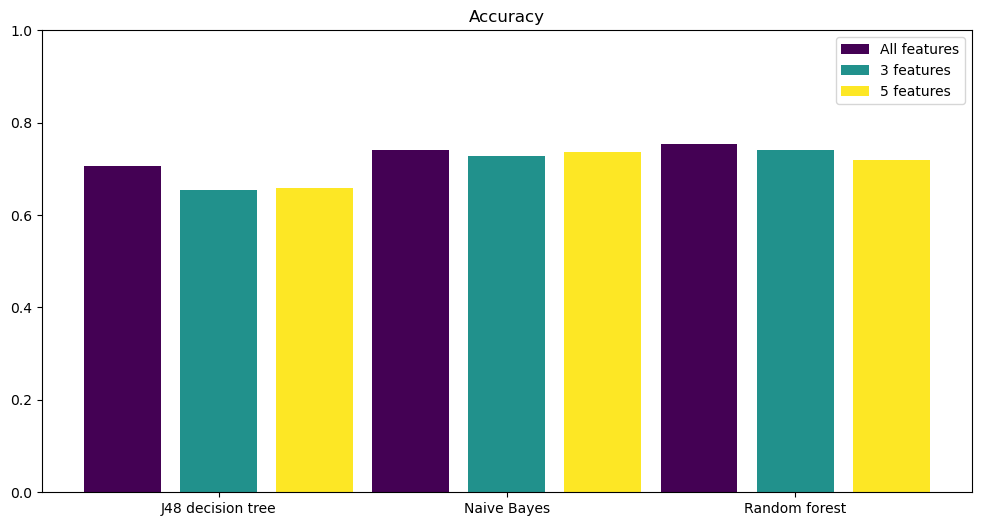

In [13]:
feature_number = ['All features', '3 features', '5 features']
ml_names = ['J48 decision tree', 'Naive Bayes', 'Random forest']

colors = plt.cm.viridis(np.linspace(0, 1, len(feature_number)))
fig, ax = plt.subplots(figsize=(12, 6))

for i, name in enumerate(ml_names):
    for j, features in enumerate(feature_number):
        color = colors[j]
        metric = accuracy_score(y_test, algorithms[i*3+j])
        ax.bar(i * len(feature_number) + j, metric, color=color, label=features, width=0.8)

ax.set_xticks(np.arange(len(ml_names)) * len(feature_number) + (len(feature_number) - 1) / 2)
ax.set_xticklabels(ml_names)
ax.set_title('Accuracy')
ax.set_ylim(0, 1)
ax.legend(feature_number)

plt.show()


##### c2) Precision

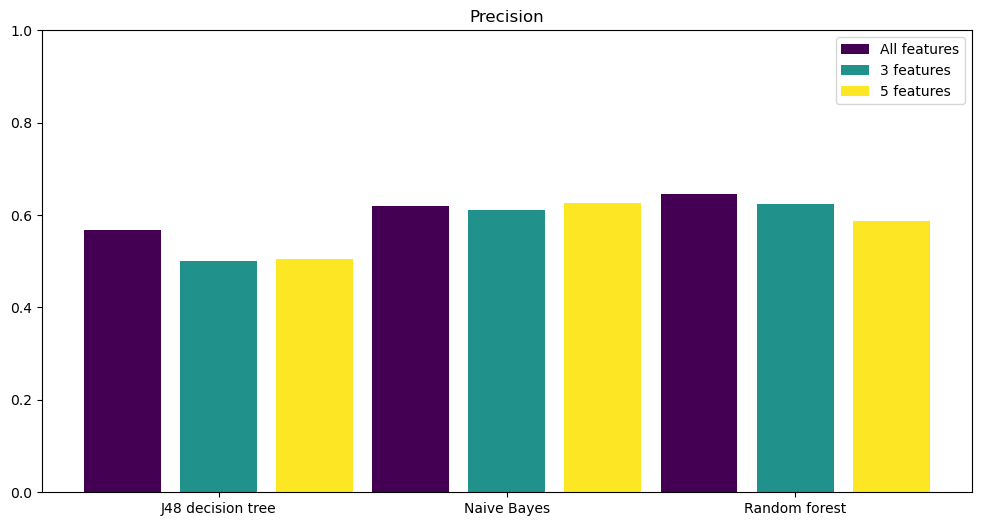

In [14]:
feature_number = ['All features', '3 features', '5 features']
ml_names = ['J48 decision tree', 'Naive Bayes', 'Random forest']

colors = plt.cm.viridis(np.linspace(0, 1, len(feature_number)))
fig, ax = plt.subplots(figsize=(12, 6))

for i, name in enumerate(ml_names):
    for j, features in enumerate(feature_number):
        color = colors[j]
        metric = precision_score(y_test, algorithms[i*3+j])
        ax.bar(i * len(feature_number) + j, metric, color=color, label=features, width=0.8)

ax.set_xticks(np.arange(len(ml_names)) * len(feature_number) + (len(feature_number) - 1) / 2)
ax.set_xticklabels(ml_names)
ax.set_title('Precision')
ax.set_ylim(0, 1)
ax.legend(feature_number)

plt.show()


##### c3) Sensitivity

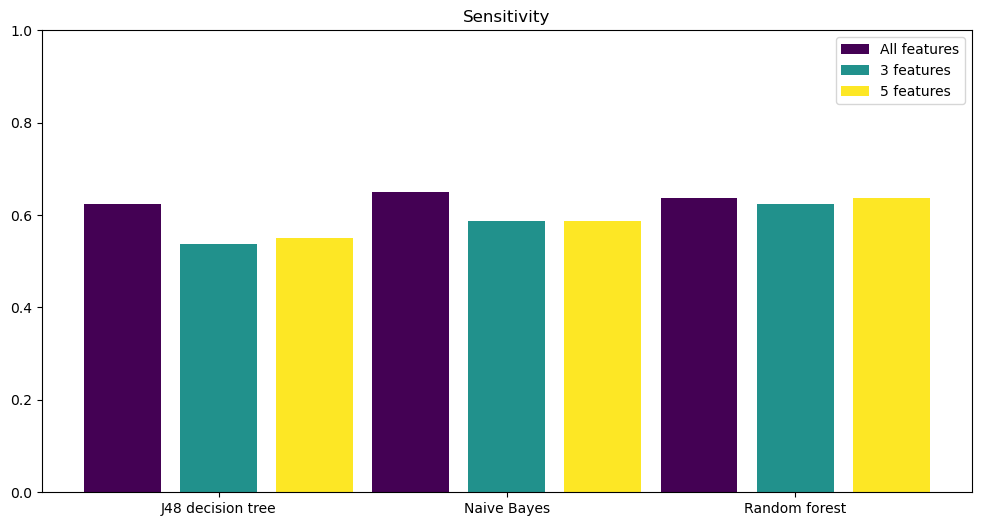

In [15]:
feature_number = ['All features', '3 features', '5 features']
ml_names = ['J48 decision tree', 'Naive Bayes', 'Random forest']

colors = plt.cm.viridis(np.linspace(0, 1, len(feature_number)))
fig, ax = plt.subplots(figsize=(12, 6))

for i, name in enumerate(ml_names):
    for j, features in enumerate(feature_number):
        color = colors[j]
        metric = recall_score(y_test, algorithms[i*3+j])
        ax.bar(i * len(feature_number) + j, metric, color=color, label=features, width=0.8)

ax.set_xticks(np.arange(len(ml_names)) * len(feature_number) + (len(feature_number) - 1) / 2)
ax.set_xticklabels(ml_names)
ax.set_title('Sensitivity')
ax.set_ylim(0, 1)
ax.legend(feature_number)

plt.show()


##### c4) Specifity

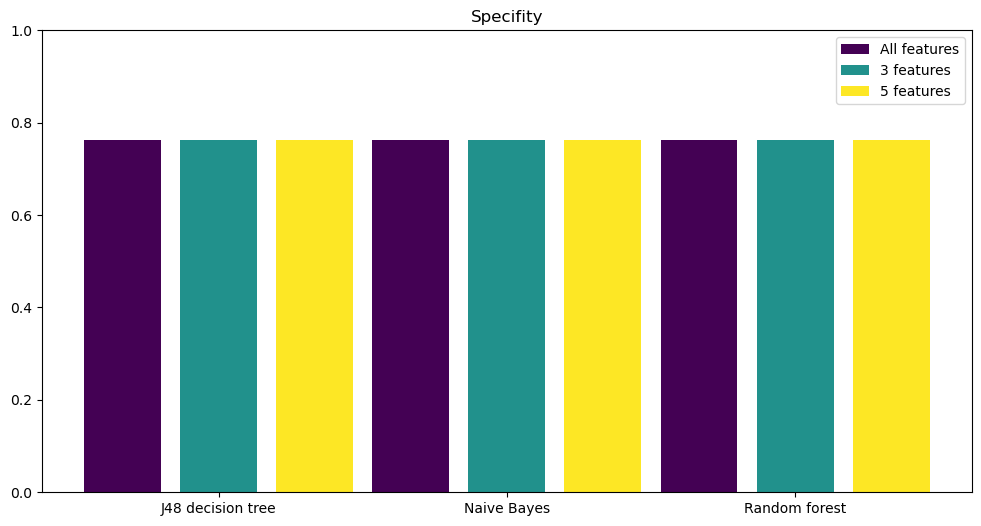

In [16]:
feature_number = ['All features', '3 features', '5 features']
ml_names = ['J48 decision tree', 'Naive Bayes', 'Random forest']

colors = plt.cm.viridis(np.linspace(0, 1, len(feature_number)))
fig, ax = plt.subplots(figsize=(12, 6))

for i, name in enumerate(ml_names):
    for j, features in enumerate(feature_number):
        color = colors[j]
        conf_matrix = confusion_matrix(y_test, predictions)
        TN = conf_matrix[0, 0]
        FP = conf_matrix[0, 1]
        metric = TN / (TN + FP)
        ax.bar(i * len(feature_number) + j, metric, color=color, label=features, width=0.8)

ax.set_xticks(np.arange(len(ml_names)) * len(feature_number) + (len(feature_number) - 1) / 2)
ax.set_xticklabels(ml_names)
ax.set_title('Specifity')
ax.set_ylim(0, 1)
ax.legend(feature_number)

plt.show()


##### c5) F-score

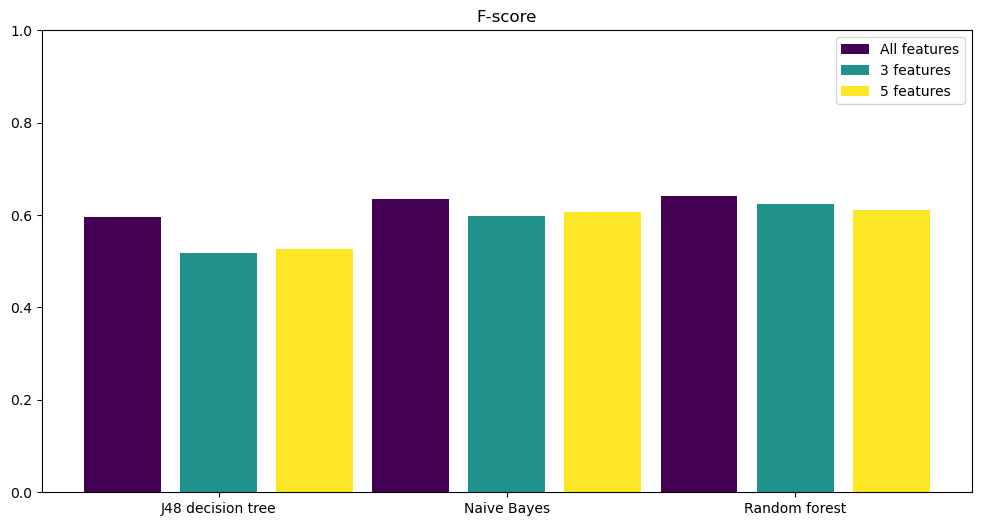

In [17]:
feature_number = ['All features', '3 features', '5 features']
ml_names = ['J48 decision tree', 'Naive Bayes', 'Random forest']

colors = plt.cm.viridis(np.linspace(0, 1, len(feature_number)))
fig, ax = plt.subplots(figsize=(12, 6))

for i, name in enumerate(ml_names):
    for j, features in enumerate(feature_number):
        color = colors[j]
        metric = f1_score(y_test, algorithms[i*3+j])
        ax.bar(i * len(feature_number) + j, metric, color=color, label=features, width=0.8)

ax.set_xticks(np.arange(len(ml_names)) * len(feature_number) + (len(feature_number) - 1) / 2)
ax.set_xticklabels(ml_names)
ax.set_title('F-score')
ax.set_ylim(0, 1)
ax.legend(feature_number)

plt.show()


##### c6) AUC-ROC curves

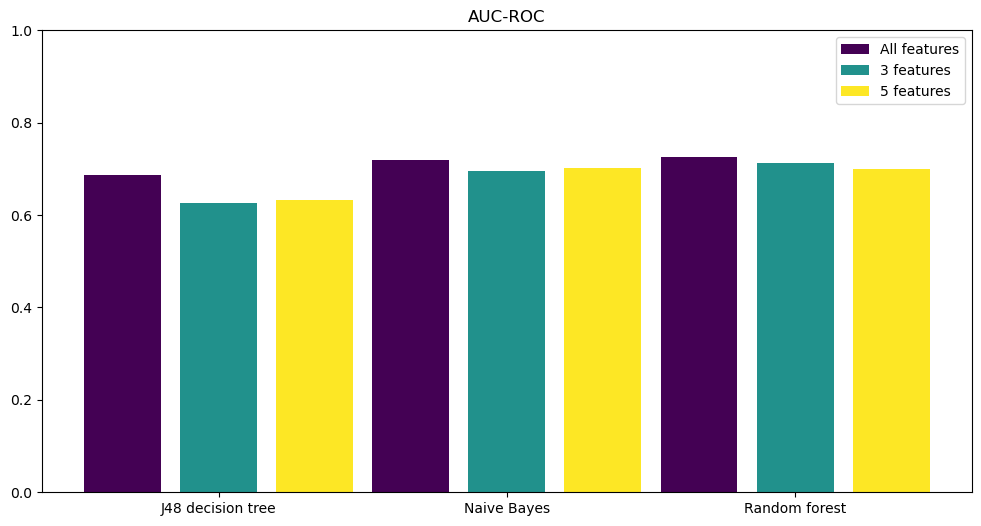

In [18]:
feature_number = ['All features', '3 features', '5 features']
ml_names = ['J48 decision tree', 'Naive Bayes', 'Random forest']

colors = plt.cm.viridis(np.linspace(0, 1, len(feature_number)))
fig, ax = plt.subplots(figsize=(12, 6))

for i, name in enumerate(ml_names):
    for j, features in enumerate(feature_number):
        color = colors[j]
        metric = roc_auc_score(y_test, algorithms[i*3+j])
        ax.bar(i * len(feature_number) + j, metric, color=color, label=features, width=0.8)

ax.set_xticks(np.arange(len(ml_names)) * len(feature_number) + (len(feature_number) - 1) / 2)
ax.set_xticklabels(ml_names)
ax.set_title('AUC-ROC')
ax.set_ylim(0, 1)
ax.legend(feature_number)

plt.show()


#### d) Cross validation

In [21]:
from sklearn.model_selection import cross_val_score

algorithms = [decision_tree, decision_tree2, decision_tree3, naive_bayes, naive_bayes2, naive_bayes3, random_forest, random_forest2, random_forest3]

for name, algorithm in zip(names, algorithms):
    scores = cross_val_score(algorithm, X, y, cv=5)
    print(f"{name}:\t{scores};\t\tprosjek: {round(np.mean(scores),4)}")


Decision tree - all features:	[0.68831169 0.63636364 0.65584416 0.74509804 0.73856209];		prosjek: 0.6928
Decision tree - 3 features:	[0.66883117 0.64935065 0.66883117 0.75163399 0.75163399];		prosjek: 0.6981
Decision tree - 5 features:	[0.70779221 0.64285714 0.65584416 0.74509804 0.74509804];		prosjek: 0.6993
Naive Bayes - all features:	[0.74025974 0.73376623 0.74025974 0.79738562 0.73856209];		prosjek: 0.75
Naive Bayes - 3 features:	[0.74025974 0.73376623 0.74025974 0.79738562 0.73856209];		prosjek: 0.75
Naive Bayes - 5 features:	[0.74025974 0.73376623 0.74025974 0.79738562 0.73856209];		prosjek: 0.75
Random forest - all features:	[0.76623377 0.73376623 0.74675325 0.82352941 0.71895425];		prosjek: 0.7578
Random forest - 3 features:	[0.73376623 0.75324675 0.75974026 0.84313725 0.75816993];		prosjek: 0.7696
Random forest - 5 features:	[0.75324675 0.71428571 0.74675325 0.82352941 0.73202614];		prosjek: 0.754
